## 1. Introduction to Topic Modeling

1.1 Overview of Topic Modeling
Definition:

Topic modeling is an unsupervised machine learning technique that automatically identifies topics present in a collection of documents. Each topic is represented as a collection of words that frequently co-occur.

Importance:

Helps in understanding large volumes of text data.
Useful in various applications such as document classification, text summarization, information retrieval, and sentiment analysis.

Applications:

Academic Research: Analyzing trends in research papers.
Business Intelligence: Extracting themes from customer reviews.
Content Recommendation: Enhancing recommendation systems by understanding user interests.
Social Media Analysis: Identifying trending topics on platforms like Twitter.

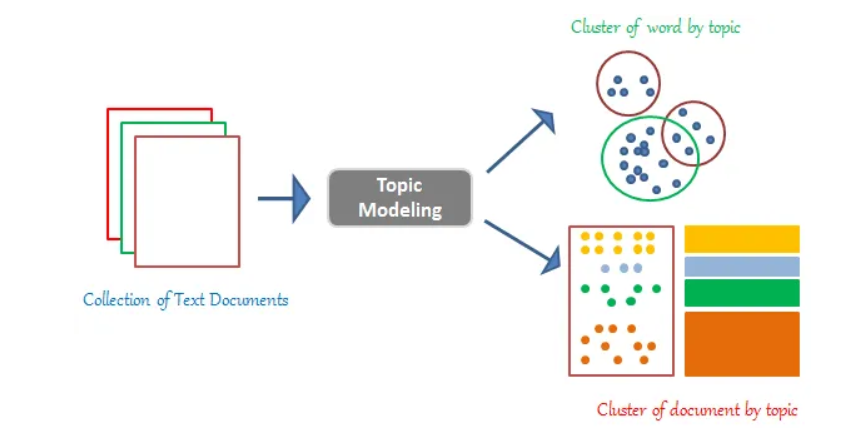

## 1.2 Types of Topic Models
Latent Dirichlet Allocation (LDA):

A generative probabilistic model that assumes each document is a mixture of topics, and each topic is a mixture of words.
Widely used and well-studied model for topic extraction.

Non-Negative Matrix Factorization (NMF):

An algebraic method that decomposes the document-term matrix into two lower-dimensional matrices, representing documents and topics.
Often used due to its simplicity and effectiveness.

Latent Semantic Analysis (LSA):

A technique based on singular value decomposition (SVD) of the term-document matrix.
Useful for uncovering the hidden structure in text data.

Other Models:

Hierarchical Dirichlet Process (HDP): Allows the number of topics to be determined from the data.

Correlated Topic Model (CTM): Accounts for correlations between topics.

Use Cases and Examples

News Articles: Extracting topics like politics, sports, and entertainment from a news corpus.

Scientific Papers: Identifying research trends and emerging fields from a collection of scientific publications.

Customer Reviews: Understanding common themes and sentiments in product reviews.

## Introduction to Latent Dirichlet Allocation (LDA)

Concepts and Theory

Generative Probabilistic Model:

LDA is a generative probabilistic model for collections of discrete data such as text corpora.
It assumes that documents are generated from a mixture of topics, where each topic is a distribution over words.

## Dirichlet Distribution:

A Dirichlet distribution is a family of continuous multivariate probability distributions parameterized by a vector of positive reals.
In LDA, two Dirichlet distributions are used:
Document-Topic Distribution (θ): Distribution of topics in a document.
Topic-Word Distribution (φ): Distribution of words in a topic.
Plate Notation:

A graphical representation used to represent the dependencies among the random variables in LDA.
Shows the hierarchical structure where documents are composed of topics, and topics are composed of words.

## The LDA Process
Assumptions:

Each document is a mixture of various topics.
Each word in a document is attributable to one of the document’s topics.
Step-by-Step Process:

Choose N: The number of words in the document (from a Poisson distribution).
Choose θ: The topic distribution for the document (from a Dirichlet distribution with parameter α).
For each of the N words in the document:
Choose a topic z (from a multinomial distribution with parameter θ).
Choose a word w from the topic z (from a multinomial distribution with parameter φ).

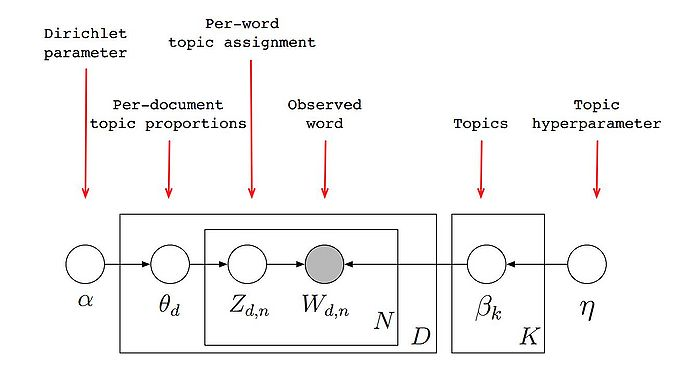

## Hyperparameters

Number of Topics (K):

The number of distinct topics to be discovered from the corpus.
Needs to be predefined.

Alpha (α):

Hyperparameter that influences the sparsity of the document-topic distribution.
Higher α values lead to documents covering more topics, while lower values lead to documents covering fewer topics.

Beta (β):

Hyperparameter that influences the sparsity of the topic-word distribution.
Higher β values lead to topics covering more words, while lower values lead to topics being more distinct.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
from gensim.models import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', categories=['sci.space', 'comp.graphics', 'rec.sport.baseball'])
data = newsgroups.data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Define a function to preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])
    # Tokenize text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
processed_data = [preprocess_text(doc) for doc in data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
dictionary = corpora.Dictionary(processed_data)
dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
corpus = [dictionary.doc2bow(doc) for doc in processed_data]
corpus[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 2),
 (10, 1),
 (11, 2),
 (12, 2),
 (13, 1),
 (14, 1),
 (15, 4),
 (16, 1),
 (17, 2),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 2),
 (22, 1),
 (23, 2),
 (24, 1),
 (25, 2),
 (26, 1),
 (27, 1),
 (28, 5),
 (29, 1),
 (30, 2),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 2),
 (36, 2),
 (37, 2),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1)]

In [14]:
num_topics = 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
## Display the topics
for idx, topic in lda_model.print_topics(num_topics):
    print(f"Topic {idx+1}: {topic}")

## Visualize the topics
# Prepare the visualization data
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1: 0.011*"edu" + 0.009*"c" + 0.008*"graphic" + 0.008*"image" + 0.007*"line" + 0.007*"p" + 0.006*"x" + 0.005*"subject" + 0.005*"data" + 0.005*"ftp"
Topic 2: 0.022*"edu" + 0.010*"line" + 0.009*"subject" + 0.009*"organization" + 0.008*"game" + 0.008*"com" + 0.007*"writes" + 0.007*"article" + 0.006*"year" + 0.005*"would"
Topic 3: 0.012*"space" + 0.010*"edu" + 0.007*"nasa" + 0.006*"would" + 0.005*"subject" + 0.005*"organization" + 0.005*"line" + 0.004*"writes" + 0.004*"one" + 0.004*"u"
Topic 4: 0.023*"image" + 0.016*"jpeg" + 0.013*"bit" + 0.012*"file" + 0.010*"color" + 0.008*"gif" + 0.007*"program" + 0.006*"format" + 0.005*"version" + 0.005*"ibm"
Topic 5: 0.014*"edu" + 0.009*"subject" + 0.009*"line" + 0.009*"organization" + 0.008*"c" + 0.006*"x" + 0.006*"university" + 0.006*"would" + 0.005*"know" + 0.005*"writes"


In [17]:
## Save the LDA model
lda_model.save('lda_model.model')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity is a statistical measure used to evaluate the goodness of fit of a probabilistic model. In the context of topic modeling, it is used to measure how well a given model predicts a sample of unseen data. Lower perplexity indicates a better fit.

Interpretation:

Lower perplexity means the model is better at predicting the data, thus indicating a better fit.
However, lower perplexity does not always equate to better topic coherence or interpretability.

In [43]:
# Load the saved LDA model
lda_model = gensim.models.LdaModel.load('lda_model.model')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
perplexity = lda_model.log_perplexity(corpus)
print(f'Perplexity: {perplexity}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity: -8.248661000023322


In [53]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])
    # Tokenize text
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Test the preprocess_text function
sample_text = "The spacecraft is designed to explore the outer regions of the solar system."
processed_sample = preprocess_text(sample_text)

print("Processed Tokens:", processed_sample)

# Convert the processed text to Bag-of-Words format
bow_random_text = dictionary.doc2bow(processed_sample)


Processed Tokens: ['spacecraft', 'designed', 'explore', 'outer', 'region', 'solar', 'system']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# Get the topic distribution for the random text
topic_distribution = lda_model[bow_random_text]

# Display the topic distribution
print("Topic Distribution for the random text:")
for topic_num, prob in topic_distribution:
    print(f"Topic {topic_num+1}: {prob:.4f}")

# Optionally, you can also see the most probable topic
if topic_distribution:
    most_probable_topic = max(topic_distribution, key=lambda x: x[1])
    print(f"Most probable topic: Topic {most_probable_topic[0]+1} with probability {most_probable_topic[1]:.4f}")
else:
    print("No topics were assigned to this text.")

Topic Distribution for the random text:
Topic 1: 0.0253
Topic 2: 0.0250
Topic 3: 0.8993
Topic 4: 0.0253
Topic 5: 0.0250
Most probable topic: Topic 3 with probability 0.8993


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Non-Negative Matrix Factorization (NMF)

Non-Negative Matrix Factorization (NMF) is a matrix factorization technique used in various applications such as topic modeling, dimensionality reduction, and feature extraction. It decomposes a matrix into two lower-dimensional matrices with the property that all the elements are non-negative, which makes it particularly useful for applications where data is inherently non-negative, such as text data.

How NMF Works ?


Given a matrix
𝑉
V of size
𝑚
×
𝑛
m×n, NMF factorizes it into two matrices:
𝑊
W of size
𝑚
×
𝑘
m×k and
𝐻
H of size
𝑘
×
𝑛
k×n, such that:

V≈WH


Properties of NMF


Non-Negativity: The non-negativity constraint makes the representation purely additive. In the context of text data, this means that documents are represented as additive combinations of topics.

Interpretability: The components of
𝑊
W and
𝐻
H are often interpretable as they represent combinations of the original data in a non-negative space.

Steps in Applying NMF for Topic Modeling

Text Preprocessing: Clean and preprocess the text data (e.g., removing stop words, lemmatization).

Convert Text to Numerical Data: Use techniques like TF-IDF (Term Frequency-Inverse Document Frequency) to convert text data into a numerical matrix.

Apply NMF: Factorize the TF-IDF matrix using NMF to identify latent topics.

Interpret Topics: Interpret the resulting matrices
𝑊
W and
𝐻
H to understand the topics and their distributions across documents.

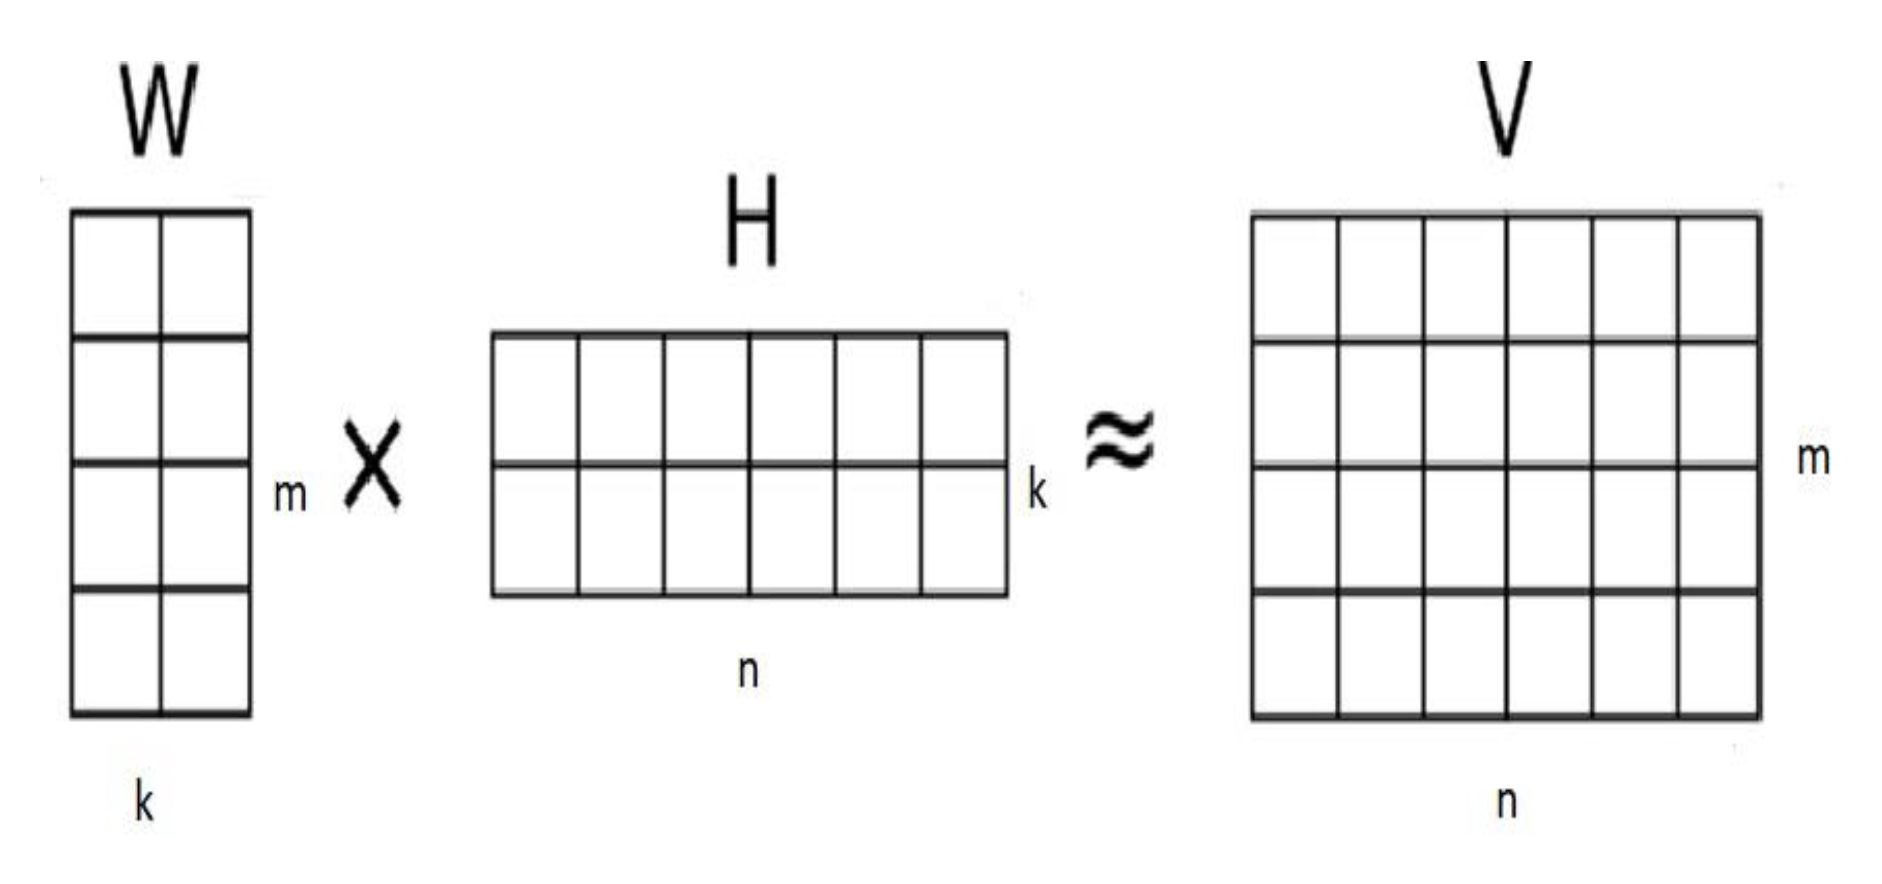

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import joblib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])
    # Tokenize text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Apply preprocessing to the dataset
processed_data = [preprocess_text(doc) for doc in data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(processed_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
## Train the NMF model
# Define the number of topics
num_topics = 5

# Train the NMF model
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)
H = nmf_model.components_

## Display the topics
# Function to display the top words for each topic
def display_topics(H, W, feature_names, num_top_words):
    for topic_idx, topic in enumerate(H):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print("\n")

num_top_words = 10
display_topics(H, W, vectorizer.get_feature_names_out(), num_top_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1:
file image graphic edu ac format bit thanks line program


Topic 2:
edu game year team player com baseball writes article run


Topic 3:
space nasa gov alaska would shuttle moon launch edu orbit


Topic 4:
access digex pat net prb com express online communication usa


Topic 5:
henry toronto zoo spencer zoology edu work article writes umd




In [26]:
## Save the NMF model
joblib.dump(nmf_model, 'nmf_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['vectorizer.joblib']